




# Molecular Solubility Machine Learning Algorithm

## Using Linear Regression






#### Loading Input Data 

In [3]:
# Importing the Pandas library for data manipulation

import pandas as pd

# Reading the CSV file from a URL into a DataFrame

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#### Data separation

In [4]:
# Display the DataFrame

print(df)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]


In [5]:
# Display the list of column names

print(df.columns.tolist())


['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion', 'logS']


#### Data separation X from Y

In [6]:
# Separating the target variable (y) which is 'logS' from the DataFrame

y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [7]:
# Dropping the target column 'logS' to get the feature matrix (X)

X = df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


#### Data Splitting

In [8]:
# Importing the train_test_split function from scikit-learn

from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [9]:
# Display the training feature matrix

X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [10]:
# Display the test feature matrix

X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


#### Model Building - Linear Regression

##### Training machine learning model

In [11]:
# Importing Linear Regression model from scikit-learn

from sklearn.linear_model import LinearRegression


# Initialising the Linear Regression model

linreg = LinearRegression()


# Fitting the model on the training data

linreg.fit(X_train, y_train)

LinearRegression()

##### Machine learning model implementation to conduct prediction

In [12]:
# Predicting the target variable for the training set

y_linreg_train_pre = linreg.predict(X_train)


# Predicting the target variable for the test set


y_linreg_test_pre = linreg.predict(X_test)

In [13]:
# Display the predictions for the training set

y_linreg_train_pre

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [14]:
# Display the predictions for the test set

y_linreg_test_pre

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

##### ML model performance evaluation

In [15]:
# Importing metrics from scikit-learn

from sklearn.metrics import mean_squared_error, r2_score#


# Calculating MSE and R2 for the training set

linreg_train_mse = mean_squared_error(y_train, y_linreg_train_pre)
linreg_train_r2 = r2_score(y_train, y_linreg_train_pre)

# Calculating MSE and R2 for the test set

linreg_test_mse = mean_squared_error(y_test, y_linreg_test_pre)
linreg_test_r2 = r2_score(y_test, y_linreg_test_pre)

In [16]:
# Displaying the calculated metrics

print('LinReg MSE (Train): ', linreg_train_mse)
print('LinReg R2 (Train): ', linreg_train_r2)
print('LinReg MSE (Test): ', linreg_test_mse)
print('LinReg R2 (Test): ', linreg_test_r2)

LinReg MSE (Train):  1.007536295109369
LinReg R2 (Train):  0.7645051774663391
LinReg MSE (Test):  1.0206953660861033
LinReg R2 (Test):  0.7891616188563282


In [17]:
# Storing results in a DataFrame for easy visualization

linreg_results = pd.DataFrame(['Linear regression', linreg_train_mse, linreg_train_r2, linreg_test_mse, linreg_test_r2]).transpose()
linreg_results.columns = ['Model', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [18]:
linreg_results

,Model,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


Text(0.5, 0, 'Experimental LogS')

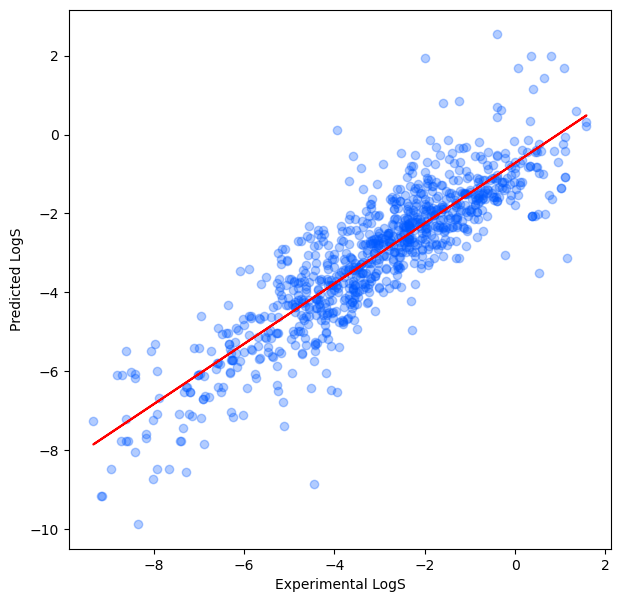

In [19]:
# Importing matplotlib for plotting

import matplotlib.pyplot as plt
import numpy as np

# Plotting the actual vs predicted values

plt.figure(figsize=(7,7))
plt.scatter(x=y_train, y=y_linreg_train_pre, c="#0059ff" ,alpha=0.3)

# Adding a best-fit line

z = np.polyfit(y_train, y_linreg_train_pre, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#ff0000')

# Adding labels and title

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')